In [1]:
%autosave 10
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['font.size'] = 4

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [20]:
df = pd.read_csv('cleaned_data.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
                                                   test_size = 0.2, random_state = 24)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [21]:
from sklearn.linear_model import LogisticRegression
my_lr = LogisticRegression(C = 0.1, solver='liblinear')
model = my_lr.fit(X_train, y_train)

In [36]:
model.score(X_test, y_test)

0.7834239639977498

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [22]:
y_proba = model.predict_proba(X_test)
y_proba

array([[0.74826924, 0.25173076],
       [0.584297  , 0.415703  ],
       [0.79604453, 0.20395547],
       ...,
       [0.584297  , 0.415703  ],
       [0.82721498, 0.17278502],
       [0.66393434, 0.33606566]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [24]:
from sklearn import metrics
pos_proba = y_proba[:,1]
metrics.roc_auc_score(y_test, pos_proba)

0.6201990844642832

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'Roc curve for logistic regression')

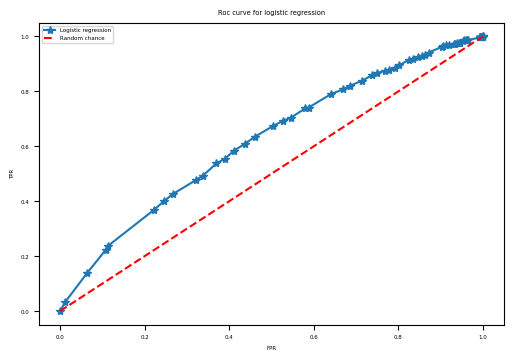

In [28]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0,1],[0,1],'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Roc curve for logistic regression')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [29]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, pos_proba)

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


(0.0, 1.0)

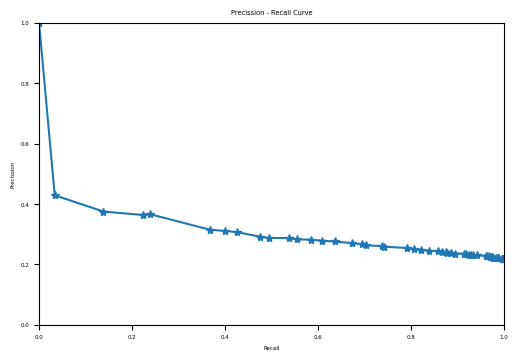

In [31]:
plt.plot(recall, precision, '-*')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.title('Precission - Recall Curve')
plt.xlim([0,1])
plt.ylim([0,1])

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [33]:
metrics.auc(recall, precision)

0.31566964427378624

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [35]:
x_pred = model.predict_proba(X_train)
metrics.roc_auc_score(y_train, x_pred[:,1])

0.6182918113358344

    How is this different, conceptually and quantitatively, from your earlier calculation?


For our train data roc auc - 0.618
For our test  data roc auc - 0.620